In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Path_Leptoquarks_searches = os.path.dirname(os.path.dirname(os.path.realpath('N_events.ipynb')))

In [2]:
Efficiences_Folder = 'Cumulative_Efficiences'

In [3]:
os.makedirs(Efficiences_Folder, exist_ok=True)

In [4]:
channels = ["hadronic_dLQ", "hadronic_sLQ", "hadronic_non-resonant", "semileptonic_dLQ", "semileptonic_sLQ", "semileptonic_non-resonant"]

In [5]:
Luminosity = 137*1000

for channel in channels:
    cutflows_path = os.path.join(Path_Leptoquarks_searches, '03_delphes_preselection/Cutflows', f'{channel}.csv')
    cutflows_file = pd.read_csv(cutflows_path, index_col= 0)
    cutflows_file = cutflows_file.dropna()
    
    columns = cutflows_file.columns
    index = cutflows_file.index
    
    Efficiences = cutflows_file.copy()
    Efficiences.columns = columns
    Efficiences.index = index
    
    for signal in columns:
        for cut in list(index)[1:]:
            Efficience = cutflows_file[signal][cut]/cutflows_file[signal]['All']
            Efficiences[signal][cut] = Efficience
            
    Efficiences.to_csv(f'{Efficiences_Folder}/{channel}.csv')    

In [6]:
Masses = ['1250', '1500', '1750', '2000', '2250', '2500']

signals = ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']
color_by_signal = {'LQ_LQ': 'red', 'Tau_LQ': 'blue' , 'Tau_Tau': 'orange'}
label_by_signal = {'LQ_LQ': r'dLQ : p p $\rightarrow$ lq lq', 'Tau_LQ': r'sLQ : p p $\rightarrow \tau$ lq' , 'Tau_Tau': r'non-resonant : p p $\rightarrow \tau \tau$'}

label_by_signal = {'LQ_LQ': 'dLQ', 'Tau_LQ': 'sLQ' , 'Tau_Tau': 'non-resonant'}


suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
linestyle_by_betard = {'wRHC': '-', 'woRHC': '--'}
label_by_betard = {'wRHC': r'$\beta_{R}^{b \tau} = -1$', 'woRHC': r'$\beta_{R}^{b \tau} = 0$'}

titles_by_channel = {"hadronic_dLQ": r'b b $\tau_{h} \tau_{h}$', 
                     "hadronic_sLQ": r'b $\tau_{h} \tau_{h}$', 
                     "hadronic_non-resonant": r'$\tau_{h} \tau_{h}$', 
                     "semileptonic_dLQ": r'b b $\tau_{h} \tau_{lep}$', 
                     "semileptonic_sLQ": r'b $\tau_{h} \tau_{lep}$', 
                     "semileptonic_non-resonant": r'$\tau_{h} \tau_{lep}$'}

bkgs = ['ttbar', 'stop','z_jets', 'w_jets', 'ww', 'wz', 'zz']

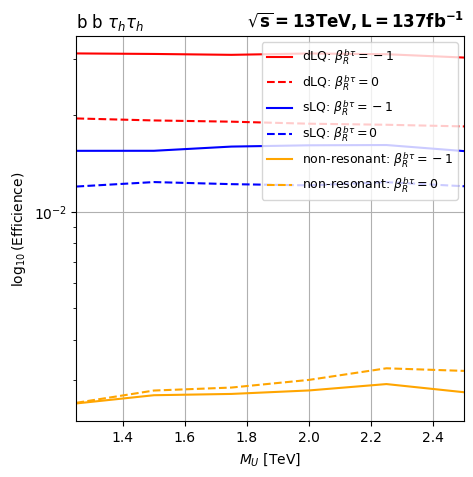

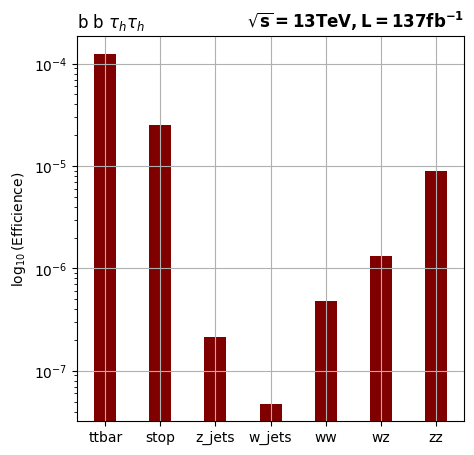

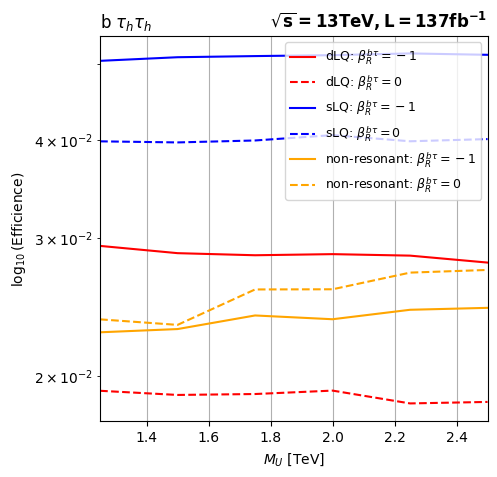

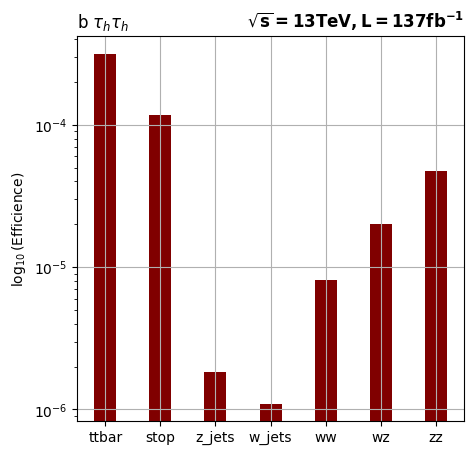

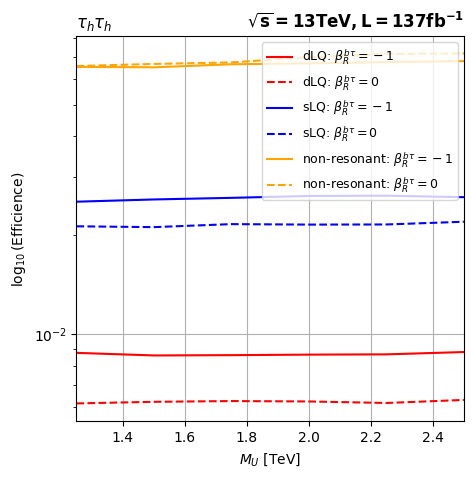

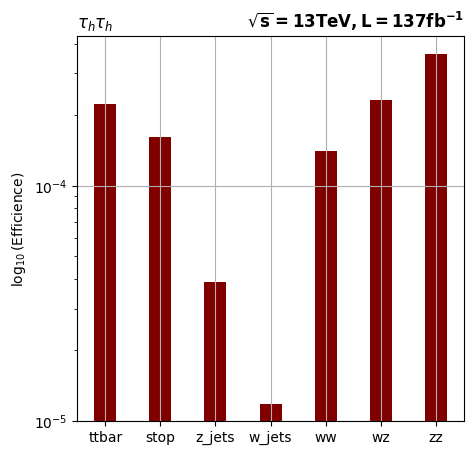

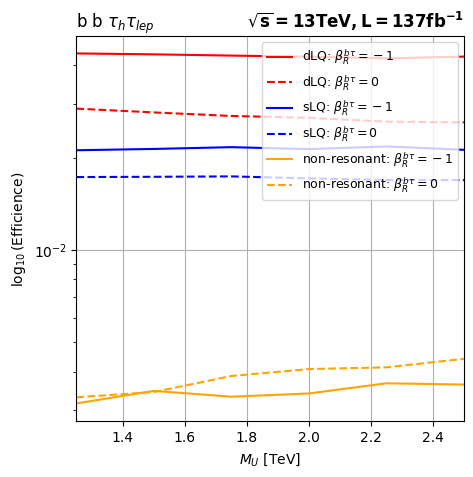

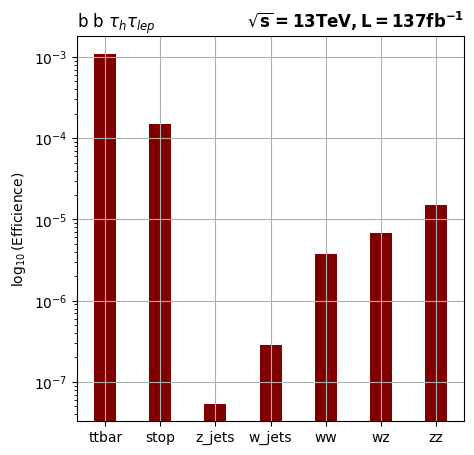

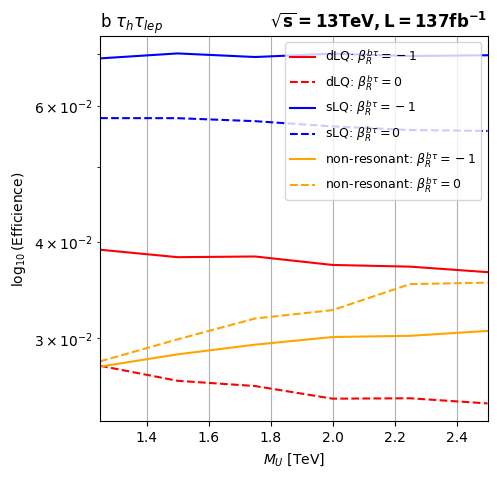

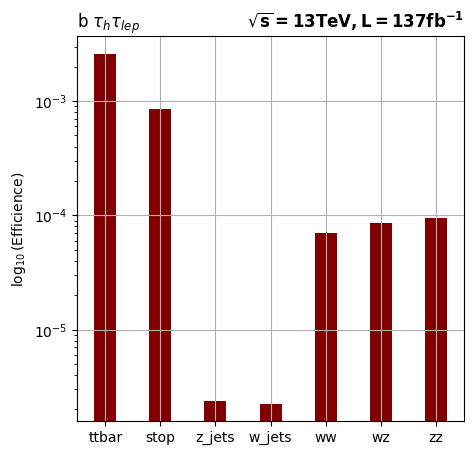

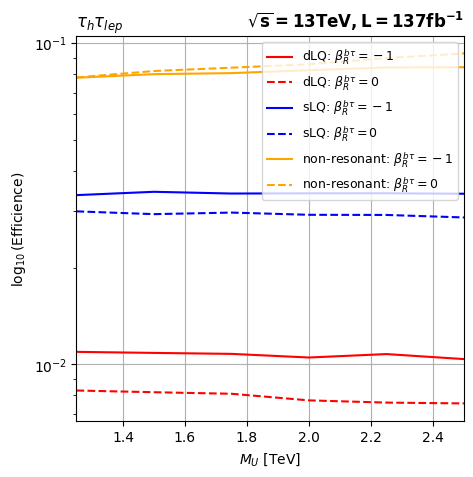

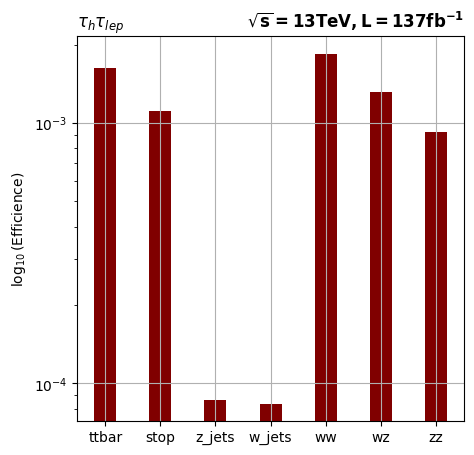

In [9]:
for channel in channels:
    
    Efficiences_file_path = os.path.join(Path_Leptoquarks_searches, '03_delphes_preselection/Cumulative_Efficiences', f'{channel}.csv')
    Efficiences_file = pd.read_csv(Efficiences_file_path, index_col= 0)
    Efficiences_file = Efficiences_file.dropna()
    
    
    fig = plt.figure(figsize = (5,5))
    
    X_axis = [float(M)/1000 for M in Masses]
    
    for signal in signals:
        for key in suffix_by_betard:
            Y_axis = [Efficiences_file[f'{signal}{suffix_by_betard[key]}_{M}']['DeltaR > 0.3'] for M in Masses]
        
            plt.plot(X_axis, Y_axis, color = color_by_signal[signal], label = fr'{label_by_signal[signal]}: {label_by_betard[key]}', linestyle = linestyle_by_betard[key])
            
    plt.title(titles_by_channel[channel], loc = 'left')
    plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$', loc = 'right')
    plt.xlabel(r'$M_{U}$ [TeV]')
    plt.ylabel(r'$\log_{10}$(Efficience)')
    plt.xlim(min(X_axis), max(X_axis))
    
    plt.yscale("log")
    plt.grid()
    #plt.legend(fontsize = 9, bbox_to_anchor=(1, 1))
    plt.legend(fontsize = 9, loc = 'upper right')
    plt.savefig(f'{Efficiences_Folder}/{channel}_signal.png', bbox_inches='tight')
    
    fig = plt.figure(figsize = (5,5))
    Y_Axis_BKG = {bkg: Efficiences_file[bkg]['DeltaR > 0.3'] for bkg in bkgs}
        
    plt.bar(list(Y_Axis_BKG.keys()), list(Y_Axis_BKG.values()), color = 'maroon',  width = 0.4)
    plt.yscale("log")
    plt.grid()
    plt.ylabel(r'$\log_{10}$(Efficience)')
    plt.title(titles_by_channel[channel], loc = 'left')
    plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$', loc = 'right')
    
    plt.savefig(f'{Efficiences_Folder}/{channel}_bkg.png', bbox_inches='tight')